# Лабораторная работа 1, Северилов Павел М05-004
## Уточнение ранговых экспертных оценок с использованием изотонической регрессии (ранжирование объектов на основе экспертных оценок.)

* **Задача**: получить рейтинг продуктов, основанный на экспертной оценке и на признаках продуктов.
* **Модель решения**: изотоничесĸая, ранговая регрессия

#### Введение

Интегральный индикатор – это число, поставленное в соответствие объекту, и рассматриваемое как оценка его качества.
Каждый объект описан набором признаков: к каждому продукту заданы значения **признаков калорийность, цена, жиры, белки, углеводы**

Одним из подходов с учителем построения интегральных индикаторов является изотоническая регрессия. Изотоническая регрессия находит неубывающее приближение функции, минимизируя среднеквадратичную ошибку обучающих данных.

Метод согласования экспертных данных заключается в том, что отыскивается вектор с монотонной последовательностью координат, наиболее близкий к заданному экспертами.


#### Интегральные индикаторы, экспертные оценки
Задана матрица описаний объектов $X = \{x_{ij}\}^{m,n}_{i=1,j=1}$. 
Вектор $x_i = (x_{i1}, x_{i2}, \cdots, x_{in})$ −
описание i−го объекта.

Интегральный индикатор — линейная комбинация вида
$$
y_{i}=\sum_{j=1}^{n} w_{j} g_{j}\left(x_{i j}\right)
$$

где $g_j$ — функция приведения показателей в единую шкалу. В работе используем нормализацию значений признаков. Будем обозначать
теперь за X приведенную таким способом матрицу «объекты-признаки». Таким образом, интегральные индикаторы
$$y=Xw$$
Заданы в ранговых шкалах экспертные оценки: $y_0$

#### Постановка задачи согласования экспертных оценок с использованием изотонической регрессии.

Пусть $y_0$ — заданное экспертами начальное приближение вектора $y$. Вектор, наиболее близкий в пространстве весов признаков к $y_0$, в смысле наименьших квадратов:
$$
\begin{array}{c}
\tilde{\mathbf{w}}=X^{+} \mathbf{y}_{0}, \text { где } \\
X^{+}=\left(X^{T} X\right)^{-1} X^{T}
\end{array}
$$
Требуется найти такую монотонную последовательность $w_1 \le \cdots \le w_n$, что она лучше всего приближает вектор $\widetilde{w}$ в смысле среднего квадрата ошибки:
$$
\left\{\begin{array}{l}
\widehat{\mathbf{w}}=\arg \min _{w \in \mathbb{R}^{n}} \sum_{j=1}^{n}\left(\widetilde{w}_{j}-w_{j}\right)^{2} \\
w_{1} \leqslant \ldots \leqslant w_{n}
\end{array}\right.
$$

Однако, чтобы получить согласованные экспертные оценки, введем в модель гиперпараметр. С его помощью мы сможем варьировать нашу «степень доверия» от экспертных оценок весов признаков (то есть, монотонной последовательности $w_1 \le \cdots \le w_n$) к экспертным оценкам интегральных индикаторов (вектору $\widehat{\mathbf{w}}$).
Таким образом, требуется найти такой вектор $\widehat{\mathbf{w}}$, что:

$$
\widehat{\mathbf{w}}=\arg \min _{\mathbf{w} \in \mathbb{R}^{n}}\left(\frac{1}{2} \sum_{j=1}^{n}\left(\widetilde{w}_{j}-w_{j}\right)^{2}+\lambda \sum_{j=1}^{n-1}\left(w_{j}-w_{j+1}\right)_{+}\right)
$$

Тогда результирующие интегральные индикаторы:
$$y_{exp} = X\widehat{\mathbf{w}}$$

In [1]:
import matplotlib.pyplot as plt
import scipy.stats as ss
import numpy as np
from sklearn.isotonic import IsotonicRegression
from sklearn import preprocessing

In [2]:
products = ['Устрицы', 
            'Арахиc соленый',
            'Молоко',
            'Макароны',
            'Овсяное молоко', 
            'Шоколад', 
            'Сырок',
            'Кефир',
            'Гречневая крупа']

X_ = np.array([[72, 85, 9, 2, 4.4],
               [640, 69, 25, 52, 17],
               [42, 5.9, 3.4, 2.5, 5],
               [371,34,3.6, 0.4, 20],
               [250, 8, 1, 3.2, 6.5],
               [545, 100, 5, 33, 56.5],
               [360.7, 35.6, 7.7, 19.1, 39.5],
               [57, 5.9, 3, 3.2, 4],
               [334, 4, 12, 2, 67]])

X_normalized = preprocessing.normalize(X_, norm='l2')

In [3]:
y_0 = [7, 4, 6, 5, 8, 2, 9, 1, 3]
X_plus = np.linalg.inv(X_normalized.T @ X_normalized) @ X_normalized.T
w_tilda = X_plus @ y_0

In [4]:
X = np.mean(X_normalized, axis=0)

In [5]:
ir = IsotonicRegression()
w_hat = ir.fit_transform(X, w_tilda)

y_old = ss.rankdata(X_normalized @ w_hat)

In [6]:
print(y_old)
print(y_0)

[7. 5. 2. 9. 8. 6. 4. 3. 1.]
[7, 4, 6, 5, 8, 2, 9, 1, 3]


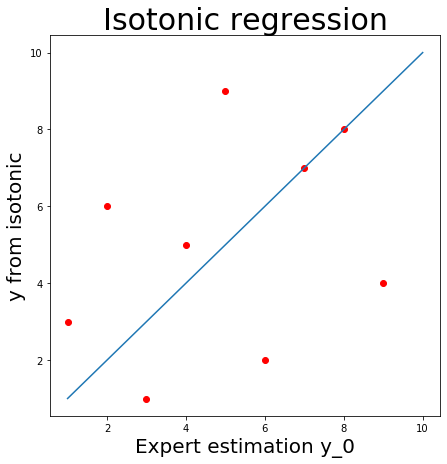

In [7]:
fig = plt.figure(figsize=(7,7))
plt.xlabel('Expert estimation y_0', fontsize=20)
plt.ylabel('y from isotonic', fontsize=20)
plt.plot(y_0, y_old, 'ro')
plt.plot(np.arange(1, 11), np.arange(1, 11))
plt.title('Isotonic regression', fontsize=30)
plt.show()

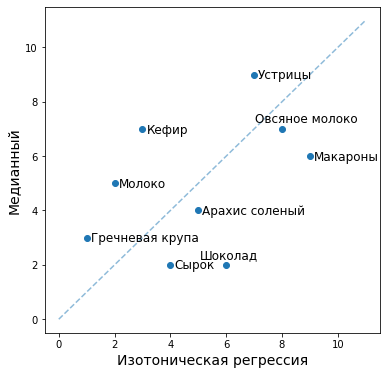

In [8]:
fig, axs = plt.subplots(1, 1, figsize=(6, 6))
plt.subplots_adjust(wspace=0.2, hspace=0.2)
 
my_rating = y_old

median_rating = [9, 4, 5, 6, 7, 2, 2, 7, 3]
 
axs.scatter(my_rating, median_rating)
axs.plot([0, 11], [0, 11], '--', alpha=0.5)
axs.set_ylabel('Медианный', fontsize=14)
axs.set_xlabel('Изотоническая регрессия', fontsize=14)
 
axs.set_xlim((-0.5, 11.5))
axs.set_ylim((-0.5, 11.5))

for i, x in enumerate(products):
    if i in [4, 5]:
        axs.annotate(x, (my_rating[i]-0.95, median_rating[i]+0.25), fontsize=12)
    else:
        axs.annotate(x, (my_rating[i]+0.15, median_rating[i]-0.15), fontsize=12)

plt.show();

In [9]:
print('Рейтинг продуктов после уточнения ранговых оценок')
print(np.concatenate((np.array(products).reshape(9, 1), np.array(y_old).reshape(9, 1)), axis=1))
print('Рейтинг продуктов эксперта')
print(np.concatenate((np.array(products).reshape(9, 1), np.array(y_0).reshape(9, 1)), axis=1))

Рейтинг продуктов после уточнения ранговых оценок
[['Устрицы' '7.0']
 ['Арахиc соленый' '5.0']
 ['Молоко' '2.0']
 ['Макароны' '9.0']
 ['Овсяное молоко' '8.0']
 ['Шоколад' '6.0']
 ['Сырок' '4.0']
 ['Кефир' '3.0']
 ['Гречневая крупа' '1.0']]
Рейтинг продуктов эксперта
[['Устрицы' '7']
 ['Арахиc соленый' '4']
 ['Молоко' '6']
 ['Макароны' '5']
 ['Овсяное молоко' '8']
 ['Шоколад' '2']
 ['Сырок' '9']
 ['Кефир' '1']
 ['Гречневая крупа' '3']]


# Lab2

## Заполнение пропусков в рейтингах

In [10]:
inp = '''4				9	5					3	9	7	6
2	6	4	8	7	4	3	3		4	6	3	4	2
5	1	5	5	4	3	8	4	2	3	5	5	6	
7	7	2	3	2	8	4	6	3	5		6	5	1
	2	7	2	6	7	5	5	7		7	7	8	
3	4	1	9	5		1	1	6	6	1	2	2	4
	3	3		1	2	6	2	1	1	2	8		5
6	5	8	4	8	1	7	7	4	7		1	1	
1	8	6	1	3	6	2	8	5	2	4	4	3	3'''

A = np.array([line.split('\t') for line in inp.split('\n')]).astype(object)
A[A!=''] = A[A!=''].astype(int)
A[A==''] = None

Будем брать для пропусков медианное значение известных оценок продукта

In [11]:
for i in range(A.shape[0]):
    none_values = (A[i] == None)
    A[i, none_values] = np.median(A[i, ~none_values])
A = np.array(A, dtype=float)
print(A)

[[4.  6.  6.  6.  9.  5.  6.  6.  6.  6.  3.  9.  7.  6. ]
 [2.  6.  4.  8.  7.  4.  3.  3.  4.  4.  6.  3.  4.  2. ]
 [5.  1.  5.  5.  4.  3.  8.  4.  2.  3.  5.  5.  6.  5. ]
 [7.  7.  2.  3.  2.  8.  4.  6.  3.  5.  5.  6.  5.  1. ]
 [7.  2.  7.  2.  6.  7.  5.  5.  7.  7.  7.  7.  8.  7. ]
 [3.  4.  1.  9.  5.  3.  1.  1.  6.  6.  1.  2.  2.  4. ]
 [2.  3.  3.  2.  1.  2.  6.  2.  1.  1.  2.  8.  2.  5. ]
 [6.  5.  8.  4.  8.  1.  7.  7.  4.  7.  5.5 1.  1.  5.5]
 [1.  8.  6.  1.  3.  6.  2.  8.  5.  2.  4.  4.  3.  3. ]]


При использовании таких методов, как медиана Кемини, наличие пропусков не влияет. Медиана Кемини существует для любого набора рейтингов – отсутсвие значения в матрице означает, что в матрице отношений частичного порядка отсутствующие значения принимаются несравнимыми (ставится значение 0, а не -1, 1)

## Согласование экпертной оценки, изотоническая регрессия

Добавим к признакам (Калорийность, Цена, белки, Жиры, Углеводы) значения рейтингов экспертов. 

Предполагаем, что экспертные оценки заданы в ранговых шкалах и допускают произвольные монотонные преобразования. Пусть на наборах экспертных оценок введено отношение порядка такое, что
$$y_{1} \leqslant \ldots \leqslant y_{n}; w_{1} \leqslant \ldots \leqslant w_{n}$$

Тогда условие задачи оптимизации о монотонности значений выполнено. Получим новую согласованную экпертную оценку изотоноческой регрессией

In [12]:
# интегральный индикатор, если значения рейтингов A не нормализуем

# начальный интегральный индикатор (мой рейтинг)
y_0 = [7, 4, 6, 5, 8, 2, 9, 1, 3]

X_new_normilized = np.concatenate((X_normalized, A), axis=1)
X_plus = np.linalg.inv(X_new_normilized.T @ X_new_normilized) @ X_new_normilized.T
w_tilda = X_plus @ y_0
X = np.mean(X_new_normilized, axis=0)
ir = IsotonicRegression()
w_hat = ir.fit_transform(X, w_tilda)

y_A_no_norm = ss.rankdata(X_new_normilized @ w_hat)

print(y_0)
print(y_A_no_norm)

[7, 4, 6, 5, 8, 2, 9, 1, 3]
[8. 5. 4. 6. 9. 2. 1. 7. 3.]


In [13]:
# интегральный индикатор, если значения рейтингов A нормализуем

# начальный интегральный индикатор (мой рейтинг)
y_0 = [7, 4, 6, 5, 8, 2, 9, 1, 3]

A_normalized = preprocessing.normalize(A, norm='l2')
X_new_normilized = np.concatenate((X_normalized, A_normalized), axis=1)
X_plus = np.linalg.inv(X_new_normilized.T @ X_new_normilized) @ X_new_normilized.T
w_tilda = X_plus @ y_0
X = np.mean(X_new_normilized, axis=0)
ir = IsotonicRegression()
w_hat = ir.fit_transform(X, w_tilda)

y_ = ss.rankdata(X_new_normilized @ w_hat)

print(y_0)
print(y_)

[7, 4, 6, 5, 8, 2, 9, 1, 3]
[8. 4. 9. 5. 6. 1. 7. 2. 3.]


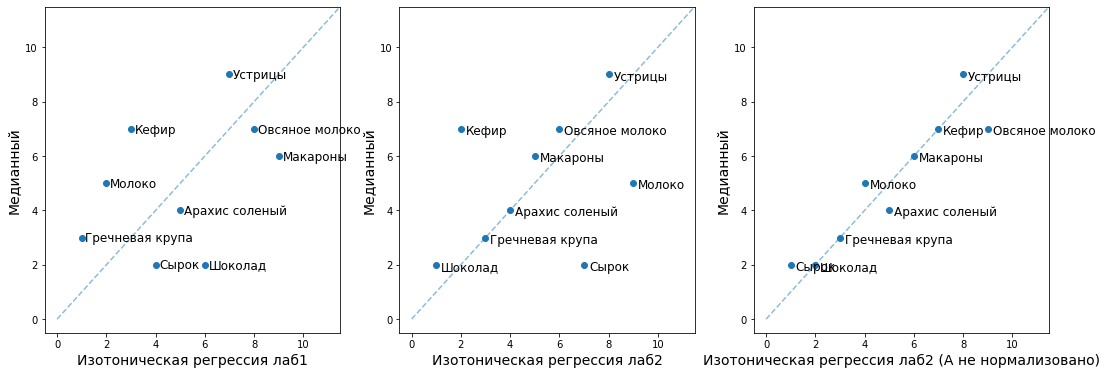

In [14]:
fig, axs = plt.subplots(1, 3, figsize=(18, 6))
plt.subplots_adjust(wspace=0.2, hspace=0.2)
 
median_rating = [9, 4, 5, 6, 7, 2, 2, 7, 3]
 
axs[0].scatter(y_old, median_rating)
axs[0].plot([0, 12], [0, 12], '--', alpha=0.5)
axs[0].set_ylabel('Медианный', fontsize=14)
axs[0].set_xlabel('Изотоническая регрессия лаб1', fontsize=14)
 
axs[1].scatter(y_, median_rating)
axs[1].plot([0, 12], [0, 12], '--', alpha=0.5)
axs[1].set_ylabel('Медианный', fontsize=14)
axs[1].set_xlabel('Изотоническая регрессия лаб2', fontsize=14)
 
axs[2].scatter(y_A_no_norm, median_rating)
axs[2].plot([0, 12], [0, 12], '--', alpha=0.5)
axs[2].set_ylabel('Медианный', fontsize=14)
axs[2].set_xlabel('Изотоническая регрессия лаб2 (A не нормализовано)', fontsize=14)

for ax in axs.ravel():
    ax.set_xlim((-0.5, 11.5))
    ax.set_ylim((-0.5, 11.5))

for i, x in enumerate(products):
    axs[0].annotate(x, (y_old[i]+0.15, median_rating[i]-0.15), fontsize=12)
    axs[1].annotate(x, (y_[i]+0.2, median_rating[i]-0.2), fontsize=12)
    axs[2].annotate(x, (y_A_no_norm[i]+0.2, median_rating[i]-0.2), fontsize=12)

plt.show();